Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

Some relevant columns in the dataset:
    

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [19]:
import pandas as pd
import numpy as np



In [98]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('avocado.csv')
df.head()

,SrNo,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [21]:
#dropping column of serial no. as we already have index.
df.drop('SrNo',axis=1,inplace=True)

In [22]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [23]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Their are 3 columns with object data type, 9 columns with float64 data type and 1 column with int64 data type.

In [24]:
df['Date']=pd.to_datetime(df['Date'])

In [29]:
df['year']=df['Date'].dt.year

In [30]:
df['month']=df['Date'].dt.month

In [32]:
df['day']=df['Date'].dt.day

In [33]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


As we got month and day column seperately, we will drop Date column.

In [34]:
df.drop('Date',axis=1,inplace=True)

In [35]:
df.shape

(1517, 14)

Shape of dataset after dropping the Date column is 1517 rows and 14 columns.

df.head(20)

In [38]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

in type columns,we have only one type of avacado, i.e., conventional, we will drop this column.

In [39]:
df.drop('type',axis=1,inplace=True)

In [42]:
df.head(50)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,2015,Albany,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,2015,Albany,11,15
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,2015,Albany,8,11
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,2015,Albany,1,11
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,2015,Albany,10,25


In [43]:
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

In [45]:
df['region'].dtypes

dtype('O')

In [46]:
df.drop('region',axis=1,inplace=True)

In [47]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [48]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
month             int64
day               int64
dtype: object

In [50]:
df.shape

(1517, 12)

Now, we have datatypes as float64 and int64, we can proceed for further operations with 1517 rows and 12 columns.

Statistical Summary

In [51]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Above is the statistical summary of the dataset, which tells us about mean, median, max value, min value for every column.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
year               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
month              AxesSubplot(0.465244,0.125;0.0945122x0.343182)
day                AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

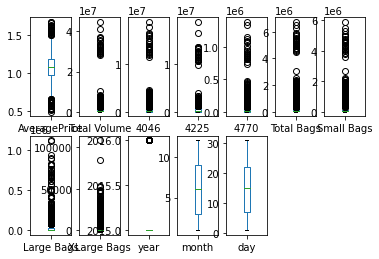

In [55]:
df.plot(kind='box',subplots=True,layout=(2,7))

We are not getting proper insight of the columns using above techinique, we will plot boxplot for all the columns one by one.

<AxesSubplot:>

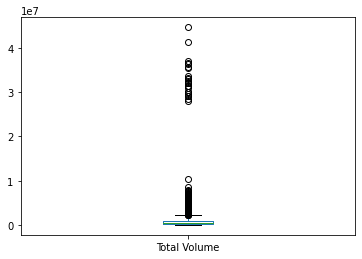

In [57]:
df['Total Volume'].plot.box()

Their are outliers present in the total Volume column.

<AxesSubplot:>

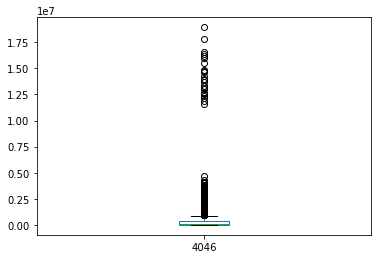

In [58]:
df['4046'].plot.box()

Outliers are present in '4406' column.

<AxesSubplot:>

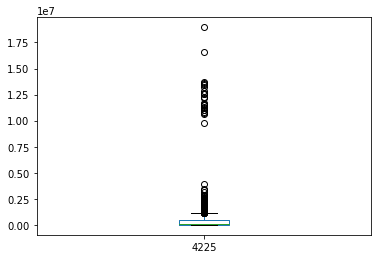

In [59]:
df['4225'].plot.box()

Outliers are present in '4225' column.

<AxesSubplot:>

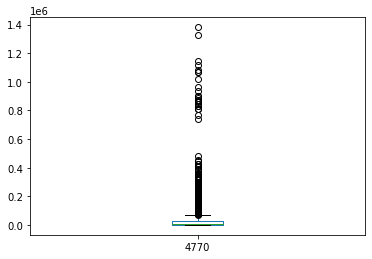

In [61]:
df['4770'].plot.box()

Outliers are present in '4470' column.

<AxesSubplot:>

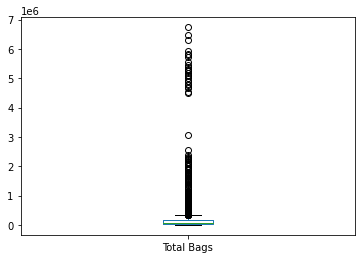

In [63]:
df['Total Bags'].plot.box()

Outliers are present in Total Bags column.

<AxesSubplot:>

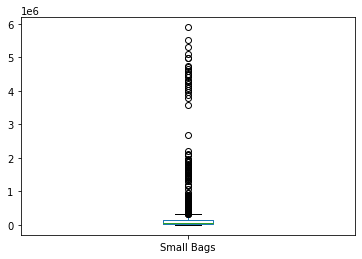

In [64]:
df['Small Bags'].plot.box()

Outliers are present in Small bags column.

<AxesSubplot:>

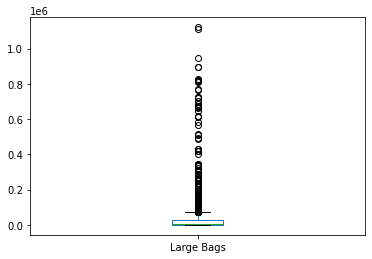

In [65]:
df['Large Bags'].plot.box()

<AxesSubplot:>

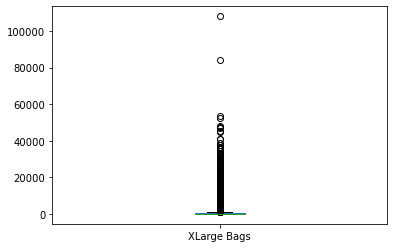

In [66]:
df['XLarge Bags'].plot.box()

Outliers present in Large Bags and Xlarge Bags column.

<AxesSubplot:>

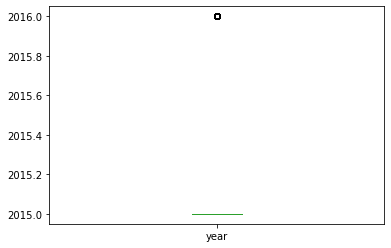

In [67]:
df['year'].plot.box()

<AxesSubplot:>

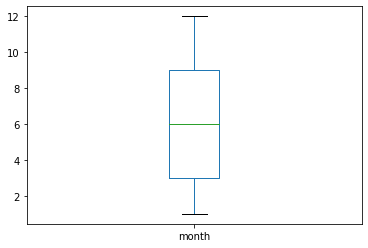

In [68]:
df['month'].plot.box()

<AxesSubplot:>

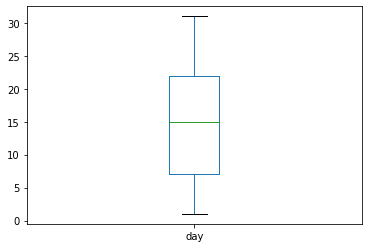

In [69]:
df['day'].plot.box()

No outliers present in month and day column.

In [70]:
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [73]:
df1=df[(z<3).all(axis=1)]

In [74]:
df.shape

(1517, 12)

In [75]:
df1.shape

(1436, 12)

In [77]:
Data_loss=(1436/1517)*100
Data_loss

94.6605141727093

Observation- After removing of outliers using zscore technique, the data loss is only 6%, from here onwards we will proceed with new dataset df1.

In [78]:
df1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month', 'day'],
      dtype='object')

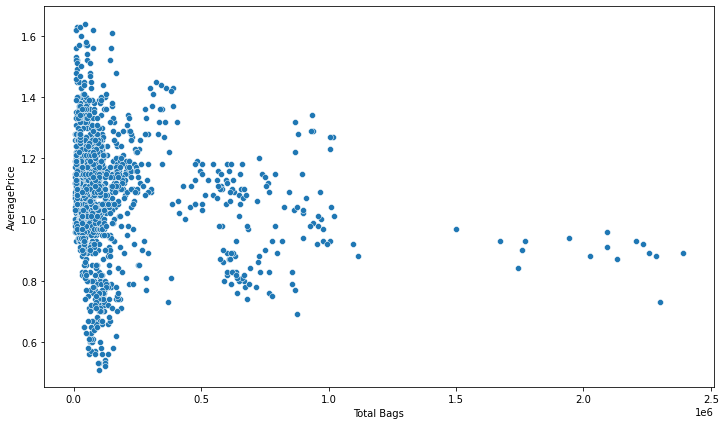

In [103]:
plt.figure(figsize=[12,7])
sns.scatterplot(df1['Total Bags'],df1['AveragePrice'])
plt.show()

Above plot shows that, their is no linear relationship is there between the two columns.

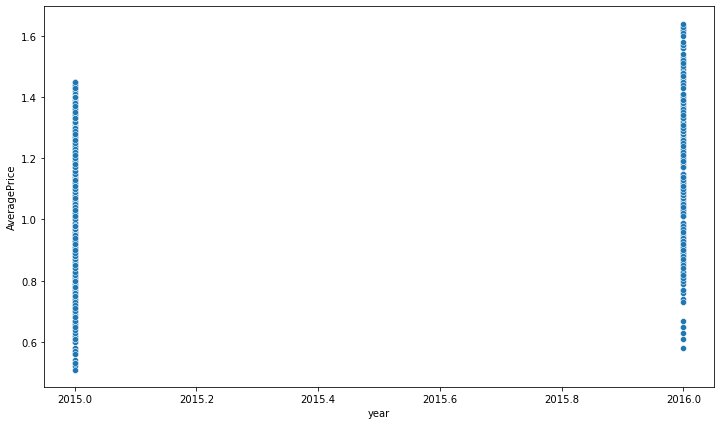

In [104]:
plt.figure(figsize=[12,7])
sns.scatterplot(df1['year'],df1['AveragePrice'])
plt.show()

Average price in the year 2015 was near about 1.48 and increased in the year 2016 upto 1.78.

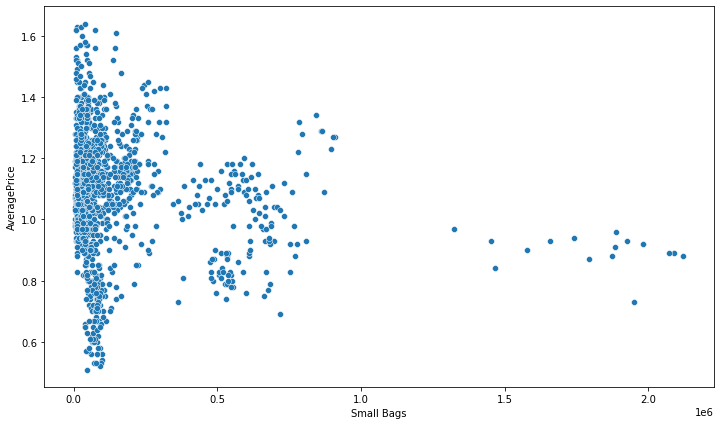

In [106]:
plt.figure(figsize=[12,7])
sns.scatterplot(df1['Small Bags'],df1['AveragePrice'])
plt.show()

Above plot shows that, their is no linear relationship is there between the two columns.

lets check the distribution of data for all the columns.

In [107]:
df1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month', 'day'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

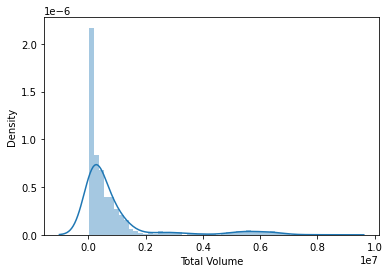

In [113]:
sns.distplot(df1['Total Volume'])

Data is distributed normally in the beginning, but then skewness occured.

<AxesSubplot:xlabel='4046', ylabel='Density'>

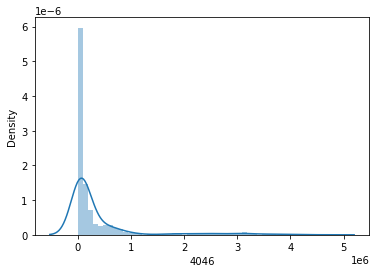

In [114]:
sns.distplot(df1['4046'])

Skewness is there in '4046' column.

<AxesSubplot:xlabel='4225', ylabel='Density'>

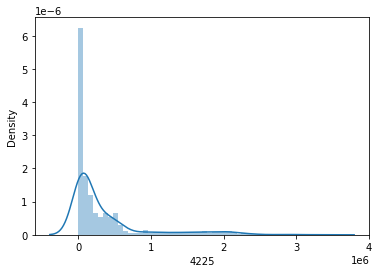

In [115]:
sns.distplot(df1['4225'])

Skewness is there in '4225' column.

<AxesSubplot:xlabel='4770', ylabel='Density'>

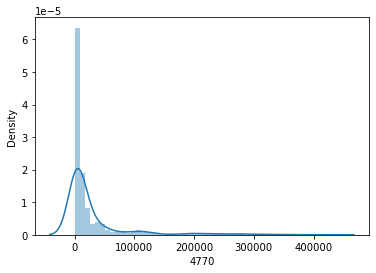

In [116]:
sns.distplot(df1['4770'])

Skewness is there in '4770' column.

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

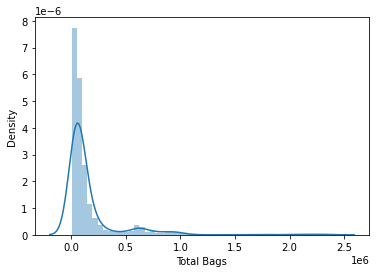

In [118]:
sns.distplot(df1['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

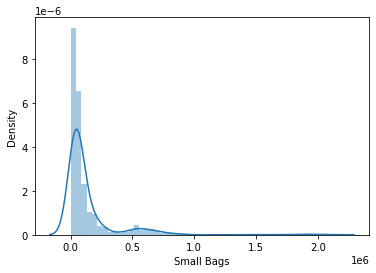

In [119]:
sns.distplot(df1['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

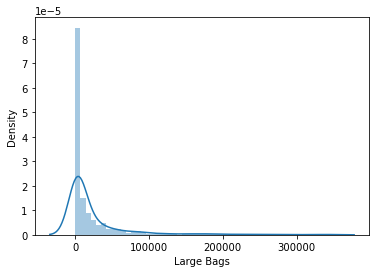

In [120]:
sns.distplot(df1['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

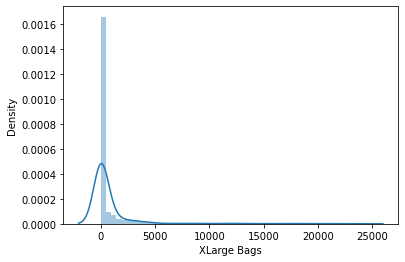

In [121]:
sns.distplot(df1['XLarge Bags'])

Skewness is present in all the 4 columns mentioned above.

correlation of all the columns with each other

In [122]:
corr=df1.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
AveragePrice,1.000000,-0.271504,-0.380282,-0.120872,-0.110292,-0.157514,-0.135342,-0.229402,-0.069536,0.173229,0.066069,0.091823
Total Volume,-0.271504,1.000000,0.914238,0.916256,0.708447,0.875613,0.859114,0.750335,0.329997,-0.025968,-0.047144,-0.018285
4046,-0.380282,0.914238,1.000000,0.696312,0.545078,0.665928,0.642025,0.630837,0.183037,-0.093937,-0.033249,-0.013321
4225,-0.120872,0.916256,0.696312,1.000000,0.678638,0.853477,0.844277,0.698375,0.303602,-0.005633,-0.045320,-0.030386
4770,-0.110292,0.708447,0.545078,0.678638,1.000000,0.730976,0.741428,0.484775,0.645120,0.044607,-0.025753,0.011683
Total Bags,-0.157514,0.875613,0.665928,0.853477,0.730976,1.000000,0.992654,0.791824,0.516496,0.114793,-0.064859,-0.003097
Small Bags,-0.135342,0.859114,0.642025,0.844277,0.741428,0.992654,1.000000,0.712355,0.533439,0.132391,-0.067076,0.002811
Large Bags,-0.229402,0.750335,0.630837,0.698375,0.484775,0.791824,0.712355,1.000000,0.263228,-0.004649,-0.038740,-0.032891
XLarge Bags,-0.069536,0.329997,0.183037,0.303602,0.645120,0.516496,0.533439,0.263228,1.000000,0.132265,-0.021421,0.020868
year,0.173229,-0.025968,-0.093937,-0.005633,0.044607,0.114793,0.132391,-0.004649,0.132265,1.000000,-0.035416,0.026913


<AxesSubplot:>

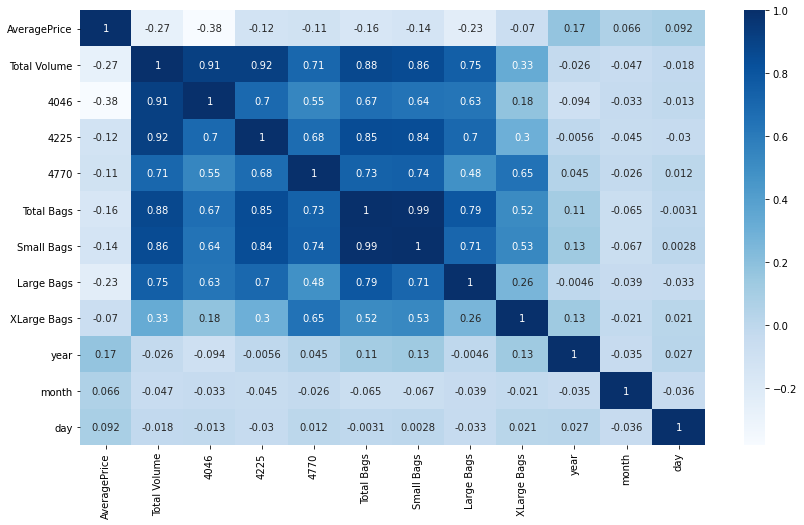

In [123]:
plt.figure(figsize=[14,8])
sns.heatmap(corr,cmap='Blues',annot=True)

Above dataset having positive as well as negative correlation values.

spliting the dataset into x and y.

In [126]:
x=df1.drop('AveragePrice',axis=1)
y=df1['AveragePrice']

In [127]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,6,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,10,16
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,9,10
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,2,10
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,9,25


In [128]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

In [129]:
#lets check the skewness of x

x.skew()

Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
month           0.111898
day             0.041849
dtype: float64

Skewness is there in multiple columns.

In [130]:
from sklearn.preprocessing import power_transform

In [131]:
X=power_transform(x)
X=pd.DataFrame(X,columns=x.columns)

In [134]:
X.skew()

Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
month          -0.136692
day            -0.212755
dtype: float64

In [145]:
#x1=X.drop('Total Volume',axis=1)
#x1

In [151]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
0,0.0,-1.729267,-0.506157,-1.648277,-2.007481,-1.828720,-1.060475,-0.846959,0.000000,1.504738,1.228848
1,0.0,-1.884928,-0.633773,-1.594456,-1.912024,-1.731311,-1.050679,-0.846959,0.000000,1.504738,0.584693
2,0.0,-1.825915,-0.060328,-1.356590,-2.078394,-1.903000,-1.038178,-0.846959,0.000000,1.504738,-0.138461
3,0.0,-1.696994,-0.327182,-1.531747,-2.451762,-2.296677,-0.979183,-0.846959,0.000000,-0.000152,-0.250943
4,0.0,-1.764471,-0.645393,-1.519205,-2.382008,-2.235649,-0.886387,-0.846959,0.000000,1.275630,1.402403
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.0,-0.081438,-0.484011,0.532615,-0.131661,-0.122820,0.392154,1.173555,2.614975,1.039319,0.183729
1432,0.0,-0.210160,-0.533430,0.581364,-0.076129,-0.023767,0.315611,-0.846959,2.614975,0.794891,-0.485180
1433,0.0,-0.179568,-0.524832,0.510641,-0.088449,-0.045757,0.299340,1.359897,2.614975,-1.306055,-0.485180
1434,0.0,-0.109419,-0.516390,0.531630,-0.067459,-0.008907,0.300322,-0.846959,2.614975,0.794891,1.051031


In [138]:
from sklearn.preprocessing import StandardScaler


In [152]:
sc=StandardScaler()
x=sc.fit_transform(X)
x

array([[ 0.        , -1.72926711, -0.50615728, ..., -0.41387044,
         1.50473762,  1.22884815],
       [ 0.        , -1.88492766, -0.63377253, ..., -0.41387044,
         1.50473762,  0.58469339],
       [ 0.        , -1.82591528, -0.06032753, ..., -0.41387044,
         1.50473762, -0.13846103],
       ...,
       [ 0.        , -0.17956808, -0.52483154, ...,  2.41621506,
        -1.30605507, -0.48518028],
       [ 0.        , -0.10941886, -0.5163901 , ...,  2.41621506,
         0.79489067,  1.0510312 ],
       [ 0.        , -0.21234265, -0.5092461 , ...,  2.41621506,
         0.79489067,  0.38779892]])

In [147]:
x.shape

(1436, 11)

In [148]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [150]:
#finding best random_state
maxr2_score=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    r_2=r2_score(y_test,pred)
    if r_2>maxr2_score:
    
        maxr2_score=r_2
        maxRs=i
        
print("Best r2_score is", maxr2_score,"on Random state", maxRs)    

Best r2_score is 0.42172124305154546 on Random state 73


In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=73)

In [154]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print(r2_score(y_test,pred))
print(LR.score(x_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.42172124305154546
0.33004561077875416
0.022805864002180314
Root mean squared Error: 0.15101610510862845


In [156]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(r2_score(y_test,pred))
print(dt.score(x_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.6141740154311769
1.0
0.015216009280742463
Root mean squared Error: 0.1233531891794552


In [157]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(r2_score(y_test,pred))
print(rf.score(x_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.8286965650902791
0.9677156940873743
0.006755777888631088
Root mean squared Error: 0.08219353921465536


In [158]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print(r2_score(y_test,pred))
print(rf.score(x_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.7458001131581746
0.9677156940873743
0.0100250060702144
Root mean squared Error: 0.10012495228570349


As we are getting very less RMSE for RandomForestRegressor, we will go for the model and do the hyperparameter tuning.

In [181]:
parameters={'n_estimators':[100],
           'max_features':['auto'],
           'max_depth':[4,5,6,7,8],
           'criterion':['mse']}

In [182]:
GCV_rf=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV_rf.fit(x_train,y_train)
GCV_rf.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [184]:
RF_mod=RandomForestRegressor(criterion='mse',max_depth=8,max_features='auto',n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

78.90723204272847


In [176]:
rf

RandomForestRegressor()

Saving the Model

In [185]:
import joblib
joblib.dump(rf,"Avacado.pkl")

['Avacado.pkl']

Loading the model

In [186]:
Model_rf=joblib.load('Avacado.pkl')

Conclusion- We got the best results for RandomForestRegressor.